# Questions for Board Meeting

## Plan 

### MVP 
1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
7. Which lessons are least accessed?
2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

### If there's time
4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?
3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students

In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# DBSCAN import
from sklearn.cluster import DBSCAN

# Scaler import
from sklearn.preprocessing import MinMaxScaler

from env import host, user, password

## Aquire

In [2]:
url = f'mysql+pymysql://{user}:{password}@{host}/curriculum_logs'

In [3]:
sql_query = query = '''
SELECT date, time, path, user_id, cohort_id, program_id, ip, name, slack, start_date, end_date, created_at, updated_at
FROM logs
JOIN cohorts on logs.cohort_id = cohorts.id
'''

In [4]:
if os.path.isfile('logs.csv'):

    # If csv file exists, read in data from csv file.
    df = pd.read_csv('logs.csv', index_col=0)

else:

    # Read fresh data from db into a DataFrame.
    df = pd.read_sql(sql_query, url)
    
    # Write DataFrame to a csv
    df.to_csv('logs.csv')

In [5]:
df.head()

,date,time,path,user_id,cohort_id,program_id,ip,name,slack,start_date,end_date,created_at,updated_at
0,2018-01-26,09:55:03,/,1,8.0,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26
1,2018-01-26,09:56:02,java-ii,1,8.0,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,2,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10


In [6]:
df.shape

(847330, 13)

In [7]:
df.isna().sum()

date          0
time          0
path          1
user_id       0
cohort_id     0
program_id    0
ip            0
name          0
slack         0
start_date    0
end_date      0
created_at    0
updated_at    0
dtype: int64

In [8]:
df = df.dropna()

## Prepare

In [9]:
# let's restart this
conditions = [df.program_id == 1, df.program_id == 2, df.program_id == 3, df.program_id == 4]
result = ['web_dev','web_dev','data_science','web_dev']
df['program'] = np.select(conditions, result)
df.head()

,date,time,path,user_id,cohort_id,program_id,ip,name,slack,start_date,end_date,created_at,updated_at,program
0,2018-01-26,09:55:03,/,1,8.0,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,web_dev
1,2018-01-26,09:56:02,java-ii,1,8.0,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,web_dev
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,web_dev
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,web_dev
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,2,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,web_dev


## Break down lessons in path by filtering by defining a path that belongs to program and then lesson
    - groupby path and count
    - assign path to label. if path == ??? then column label is lesson
    
## Find Lessons for Data Scince

In [80]:
# subset for data science where program == data scinence and name != staff
df_ds = df[(df.program=='data_science') & (df.name!='Staff')]
df_ds.head()

,date,time,path,user_id,cohort_id,program_id,ip,name,slack,start_date,end_date,created_at,updated_at,program
300225,2019-08-20,09:39:58,/,466,34.0,3,97.105.19.58,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science
300226,2019-08-20,09:39:59,/,467,34.0,3,97.105.19.58,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science
300227,2019-08-20,09:39:59,/,468,34.0,3,97.105.19.58,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science
300228,2019-08-20,09:40:02,/,469,34.0,3,97.105.19.58,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science
300229,2019-08-20,09:40:08,/,470,34.0,3,97.105.19.58,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science


In [82]:
df_ds.name.unique()

array(['Bayes', 'Curie', 'Darden', 'Easley', 'Florence'], dtype=object)

In [83]:
# group df by path and create column for count of rows for each grouped path
df_ds_lesson_count = df_ds.groupby(by=['path'])[['user_id']].agg('count').sort_values('user_id', ascending=False)[1:60].reset_index()
df_ds_lesson_count.head()

,path,user_id
0,search/search_index.json,2203
1,classification/overview,1785
2,1-fundamentals/modern-data-scientist.jpg,1655
3,1-fundamentals/AI-ML-DL-timeline.jpg,1651
4,1-fundamentals/1.1-intro-to-data-science,1633


In [84]:
# create lesson column
df_ds['lesson'] = np.where(df_ds.path.str.contains('appendix'), 'appendix',
np.where(df_ds.path.str.contains('search'), 'search',
np.where(df_ds.path.str.contains('classification'),'classification',
np.where(df_ds.path.str.contains('sql'), 'sql',
np.where(df_ds.path.str.contains('fundamentals'), 'fundamentals',
np.where(df_ds.path.str.contains('regression'), 'regression',
np.where(df_ds.path.str.contains('python'), 'python',
np.where(df_ds.path.str.contains('stats'), 'stats', 
np.where(df_ds.path.str.contains('anomaly'), 'anomaly',
np.where(df_ds.path.str.contains('clustering'), 'clustering',
np.where(df_ds.path.str.contains('nlp'), 'nlp',
np.where(df_ds.path.str.contains('timeseries'), 'time_series',
np.where(df_ds.path.str.contains('distributed-ml'), 'distributed_ml''',
np.where(df_ds.path.str.contains('storytelling'), 'storytelling',
np.where(df_ds.path.str.contains('advanced-topics'), 'advanced-topics',
np.where(df_ds.path.str.contains('capstones'), 'capstones',
'pending'))))))))))))))))
df_ds.lesson.unique()

array(['pending', 'sql', 'storytelling', 'appendix', 'fundamentals',
       'search', 'advanced-topics', 'regression', 'anomaly', 'nlp',
       'classification', 'clustering', 'time_series', 'stats', 'python',
       'distributed_ml', 'capstones'], dtype=object)

In [85]:
df.head()

,date,time,path,user_id,cohort_id,program_id,ip,name,slack,start_date,end_date,created_at,updated_at,program
0,2018-01-26,09:55:03,/,1,8.0,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,web_dev
1,2018-01-26,09:56:02,java-ii,1,8.0,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,web_dev
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,web_dev
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,web_dev
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,2,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,web_dev


In [86]:
pending_lesson = df_ds[df_ds.lesson=='pending']
pending_lesson_ds = pending_lesson.groupby('path')[['user_id']].agg('count').sort_values(by='user_id',ascending=False)
pending_lesson_ds.head(60)

,user_id
path,
/,8358
individual-project/individual-project,81
AI-ML-DL-timeline.jpg,58
modern-data-scientist.jpg,58
html-css,16
acquire,16
working-with-time-series-data,14
3-vocabulary.md,12
series,12


## Data Science Lessons (14 count): (taught to students )
- fundamentals
- sql
- capstones
- python
- regression'
- advanced-topics
- classification
- distributed-ml
- status
- clustering
- time_series
- anomaly
- nlp
- storytelling

## Data Science Not-Lessons (paths that are not curriculum)
- pending
- appendix

## Find Lessons for Web Dev

In [87]:
# subset for web_dev
df_webdev = df[(df.program=='web_dev') & (df.name!='Staff')]
df_webdev.head()

,date,time,path,user_id,cohort_id,program_id,ip,name,slack,start_date,end_date,created_at,updated_at,program
0,2018-01-26,09:55:03,/,1,8.0,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,web_dev
1,2018-01-26,09:56:02,java-ii,1,8.0,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,web_dev
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,web_dev
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,web_dev
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,2,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,web_dev


In [89]:
df_webdev.name.unique()

array(['Hampton', 'Teddy', 'Sequoia', 'Arches', 'Niagara', 'Pinnacles',
       'Quincy', 'Kings', 'Lassen', 'Mammoth', 'Glacier', 'Denali',
       'Joshua', 'Olympic', 'Ulysses', 'Badlands', 'Apollo', 'Ike',
       'Voyageurs', 'Wrangell', 'Xanadu', 'Franklin', 'Yosemite', 'Zion',
       'Andromeda', 'Betelgeuse', 'Ceres', 'Deimos', 'Europa', 'Fortuna',
       'Apex', 'Ganymede', 'Everglades', 'Hyperion', 'Bash', 'Jupiter',
       'Kalypso', 'Luna', 'Marco', 'Neptune', 'Oberon'], dtype=object)

In [91]:
# group df by path and create column for count of rows for each grouped path
df_webdev_lesson_count = df_webdev.groupby(by=['path'])[['user_id']].agg('count').sort_values('user_id', ascending=False).reset_index()
df_webdev_lesson_count.head()

,path,user_id
0,/,31156
1,toc,16669
2,javascript-i,16376
3,search/search_index.json,13982
4,html-css,11827


In [92]:
# created lesson column with values for web dev lessons
df_webdev['lesson'] = np.where(df_webdev.path.str.contains('search'),'search',
np.where(df_webdev.path.str.contains('index'),'index',
np.where(df_webdev.path.str.contains('javascript'),'javascript',
np.where(df_webdev.path.str.contains('toc'),'toc',
np.where(df_webdev.path.str.contains('java'),'java',
np.where(df_webdev.path.str.contains('html|css|html-css'),'html-css',
np.where(df_webdev.path.str.contains('spring'),'spring',
np.where(df_webdev.path.str.contains('jquery'),'jquery',
np.where(df_webdev.path.str.contains('mysql'),'mysql',
np.where(df_webdev.path.str.contains('capstone'),'capstone',
np.where(df_webdev.path.str.contains('array|syntax|object_oriented|polymorph|methods|collections|deployment'),'structure', #included lessons that seem to deal with programming in general
np.where(df_webdev.path.str.contains('php'),'php',
np.where(df_webdev.path.str.contains('larvel'),'larvel',
np.where(df_webdev.path.str.contains('fundamentals'),'fundamentals',
         
         
'pending'))))))))))))))
                                                                                                                                                
df_webdev.lesson.unique()

array(['pending', 'java', 'structure', 'javascript', 'search', 'spring',
       'capstone', 'index', 'html-css', 'mysql', 'jquery', 'php',
       'fundamentals', 'toc'], dtype=object)

In [93]:
pending_lesson_wd = df_webdev[df_webdev.lesson=='pending']
pending_lesson_wd = pending_lesson.groupby('path')[['user_id']].agg('count').sort_values(by='user_id',ascending=False)
pending_lesson_wd.head()

,user_id
path,
/,8358
individual-project/individual-project,81
AI-ML-DL-timeline.jpg,58
modern-data-scientist.jpg,58
html-css,16


## Web Dev Lessons:
- java
- javascript
- toc
- html-css
- spring
- jquery
- mysql
- structure
- php
- larvel
- fundamentals

## Web Dev Non-Lesson:
- search
- index

## See Counts for Data Science Lesson

In [95]:
# DS Lessons count from top
df_ds.groupby('lesson')[['user_id']].agg('count').sort_values(by='user_id', ascending=False).head(6)

,user_id
lesson,
fundamentals,16691
sql,13685
classification,11841
python,10492
pending,8940
regression,7471


In [96]:
# DS Lessons count fro bottom
df_ds.groupby('lesson')[['user_id']].agg('count').sort_values(by='user_id', ascending=False).tail(7)

,user_id
lesson,
time_series,3317
storytelling,3312
nlp,3208
search,2207
distributed_ml,1654
advanced-topics,1278
capstones,63


## 5 Most Popular Lessons for Data Science
- Fundamentals
- SQL
- Classfication
- Python
- Regression

## 5 Least Popular Lessons for Data Science
- time_series
- storytelling
- nlp
- distributed
- advancted topics

## See Counts for Web Dev Lesson

In [97]:
# see counts for web dev lessons from top
df_webdev.groupby('lesson')[['user_id']].agg('count').sort_values(by='user_id', ascending=False).head(6)

,user_id
lesson,
javascript,149227
java,138797
html-css,92725
mysql,71913
pending,58279
spring,52344


In [99]:
# see counts for web dev lessons from bottom
df_webdev.groupby('lesson')[['user_id']].agg('count').sort_values(by='user_id', ascending=False).tail(8)

,user_id
lesson,
jquery,50290
toc,16669
search,16000
capstone,4834
index,3587
structure,2900
php,2085
fundamentals,237


## 5 Most Popular Lessons for Web Dev
- Javascript
- Java
- HTML-CSS
- MySQL
- Spring


## ## 5 Least Popular Lessons for Web Dev\
- jquery
- toc
- fundamentals
- structure
- php

# <font color = 'red'>1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?

### Across Cohorts = lesson access average per cohort. 
- filter by program, group by cohort, display lesson with count

In [100]:
# find lesson count for each cohort for data science by groupby 'cohort', count lesson
df_ds.groupby(['name','lesson'])[['user_id']].agg('count').sort_values(['name','user_id'], ascending=False).head(60)

user_id
name     lesson                  
Florence fundamentals        3637
         sql                 2282
         python              1365
         pending              663
         classification       214
         search               162
         appendix             140
         anomaly               37
         storytelling          16
         regression            15
         clustering            10
         time_series            6
         stats                  5
         distributed_ml         4
         nlp                    4
         advanced-topics        1
         capstones              1
Easley   classification      2716
         fundamentals        2545
         sql                 1872
         python              1276
         pending             1240
         regression          1144
         stats               1008
         clustering           856
         storytelling         744
         time_series          436
         appendix             282
         anomaly              255
         search               251
         nlp                   34
         advanced-topics       26
         capstones             22
         distributed_ml         8
Darden   classification      5091
         fundamentals        4565
         sql                 4130
         pending             3164
         python              2712
         stats               2262
         anomaly             1706
         regression          1550
         clustering          1181
         appendix            1133
         nlp                 1118
         storytelling         994
         time_series          944
         search               664
         distributed_ml       569
         advanced-topics      196
         capstones             36
Curie    sql                 2879
         fundamentals        2615
         python              2552
         regression          2031
         pending             1742
         classification      1614
         stats               1351
         appendix            1177
         anomaly             1083

## Fundementals  and then SQL are both in top 3 of most popjular aross all cohorts

# 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [101]:
df_webdev.lesson.value_counts()

javascript      149227
java            138797
html-css         92725
mysql            71913
pending          58279
spring           52344
jquery           50290
toc              16669
search           16000
capstone          4834
index             3587
structure         2900
php               2085
fundamentals       237
Name: lesson, dtype: int64

In [102]:
df_webdev.lesson.value_counts(normalize=True)

javascript      0.226140
java            0.210334
html-css        0.140516
mysql           0.108978
pending         0.088317
spring          0.079323
jquery          0.076210
toc             0.025260
search          0.024247
capstone        0.007325
index           0.005436
structure       0.004395
php             0.003160
fundamentals    0.000359
Name: lesson, dtype: float64

In [103]:
def value_counts_and_frequencies(s: pd.Series, dropna=True) -> pd.DataFrame:
    return pd.merge(
        s.value_counts(dropna=False).rename('count'),
        s.value_counts(dropna=False, normalize=True).rename('proba'),
        left_index=True,
        right_index=True,
    )

In [104]:
df_lessons = value_counts_and_frequencies(df_webdev.lesson)
df_lessons.head(60)

,count,proba
javascript,149227,0.226140
java,138797,0.210334
html-css,92725,0.140516
mysql,71913,0.108978
pending,58279,0.088317
spring,52344,0.079323
jquery,50290,0.076210
toc,16669,0.025260
search,16000,0.024247
capstone,4834,0.007325


<AxesSubplot:>

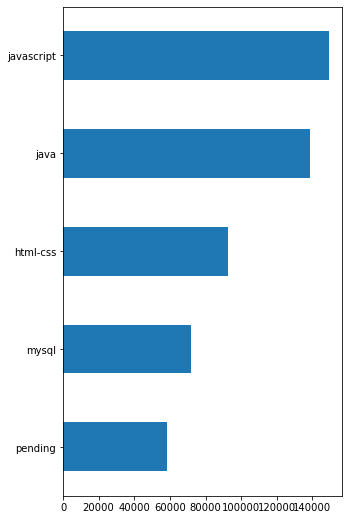

In [105]:
df_lessons['count'].sort_values().tail(5).plot.barh(figsize=(5, 9))

In [106]:
# groupby lesson, then groupby cohort, count user_id
webdev_lessons = df_webdev.groupby(['lesson','name'])[['user_id']].agg('count').sort_values(['user_id'], ascending=False).reset_index()
webdev_lessons.head(20)

,lesson,name,user_id
0,java,Jupiter,9594
1,javascript,Ceres,9359
2,javascript,Zion,8754
3,java,Voyageurs,8617
4,java,Ceres,8612
5,java,Fortuna,8485
6,java,Apex,8291
7,java,Zion,8219
8,java,Ganymede,7649
9,javascript,Fortuna,7450


In [119]:
webdev_lessons = webdev_lessons.rename(columns={'user_id':'count'})
webdev_lessons['cohort_lesson'] = webdev_lessons.name + '_' + webdev_lessons.lesson
webdev_lessons

array(['java', 'javascript', 'html-css', 'mysql', 'pending', 'spring',
       'jquery', 'toc', 'search', 'index', 'structure', 'capstone', 'php',
       'fundamentals'], dtype=object)

In [124]:
# remove lesson: pending, index, search, capstone
webdev_lessons = webdev_lessons[(webdev_lessons.lesson!='search') & (webdev_lessons.lesson!='index') & (webdev_lessons.lesson!='capstone') & (webdev_lessons.lesson!='pending')]
webdev_lessons.lesson.unique()

array(['java', 'javascript', 'html-css', 'mysql', 'spring', 'jquery',
       'toc', 'structure', 'php', 'fundamentals'], dtype=object)

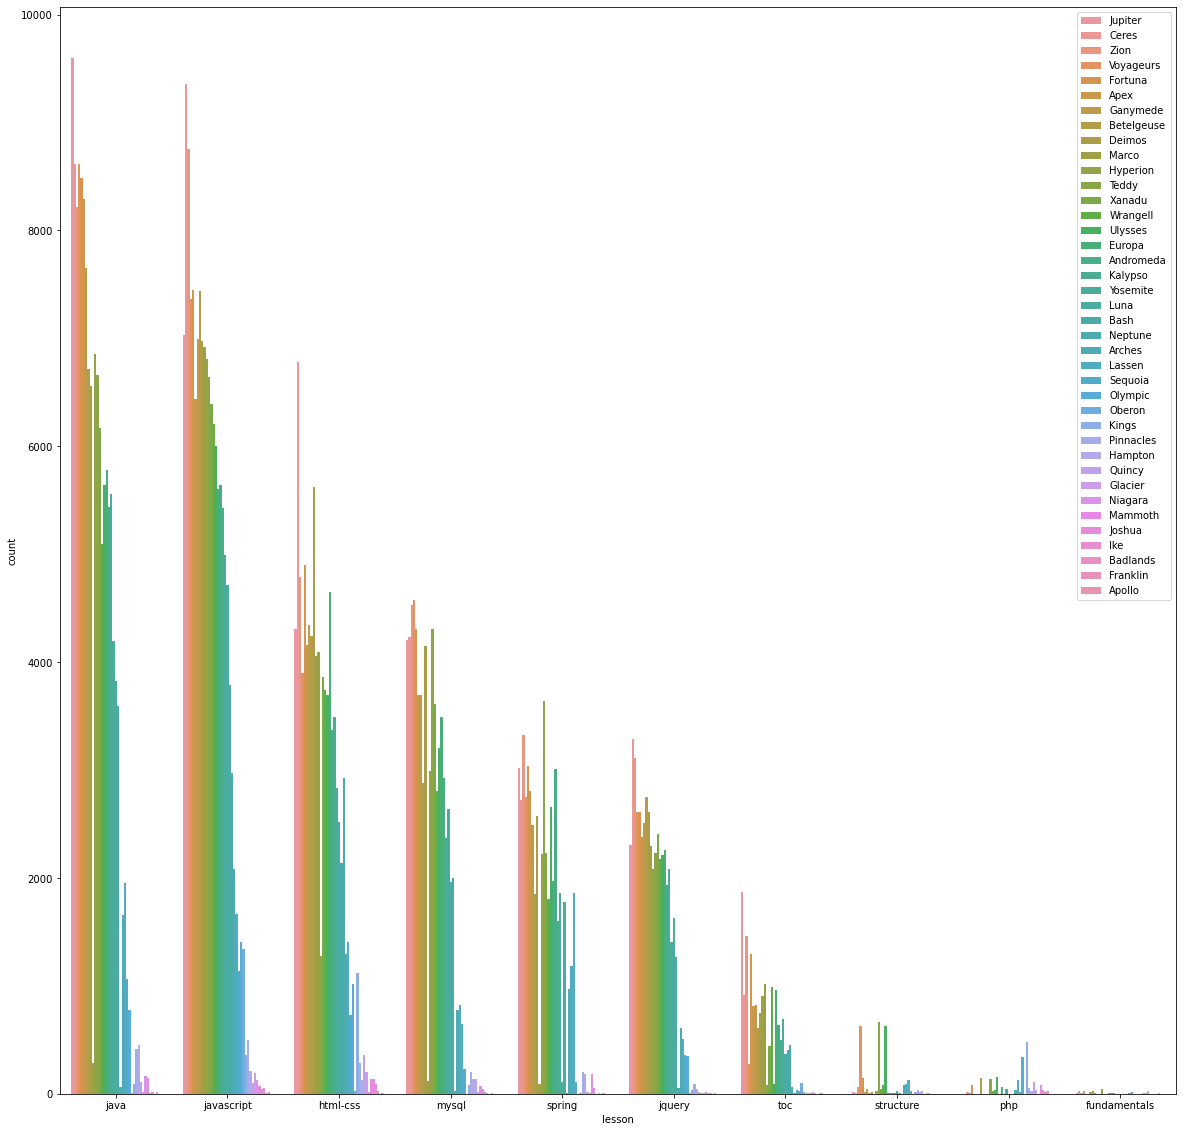

In [125]:
plt.figure(figsize=(20, 20))
sns.barplot(data=webdev_lessons, x='lesson', y='count', hue='name')
plt.legend(loc=1)

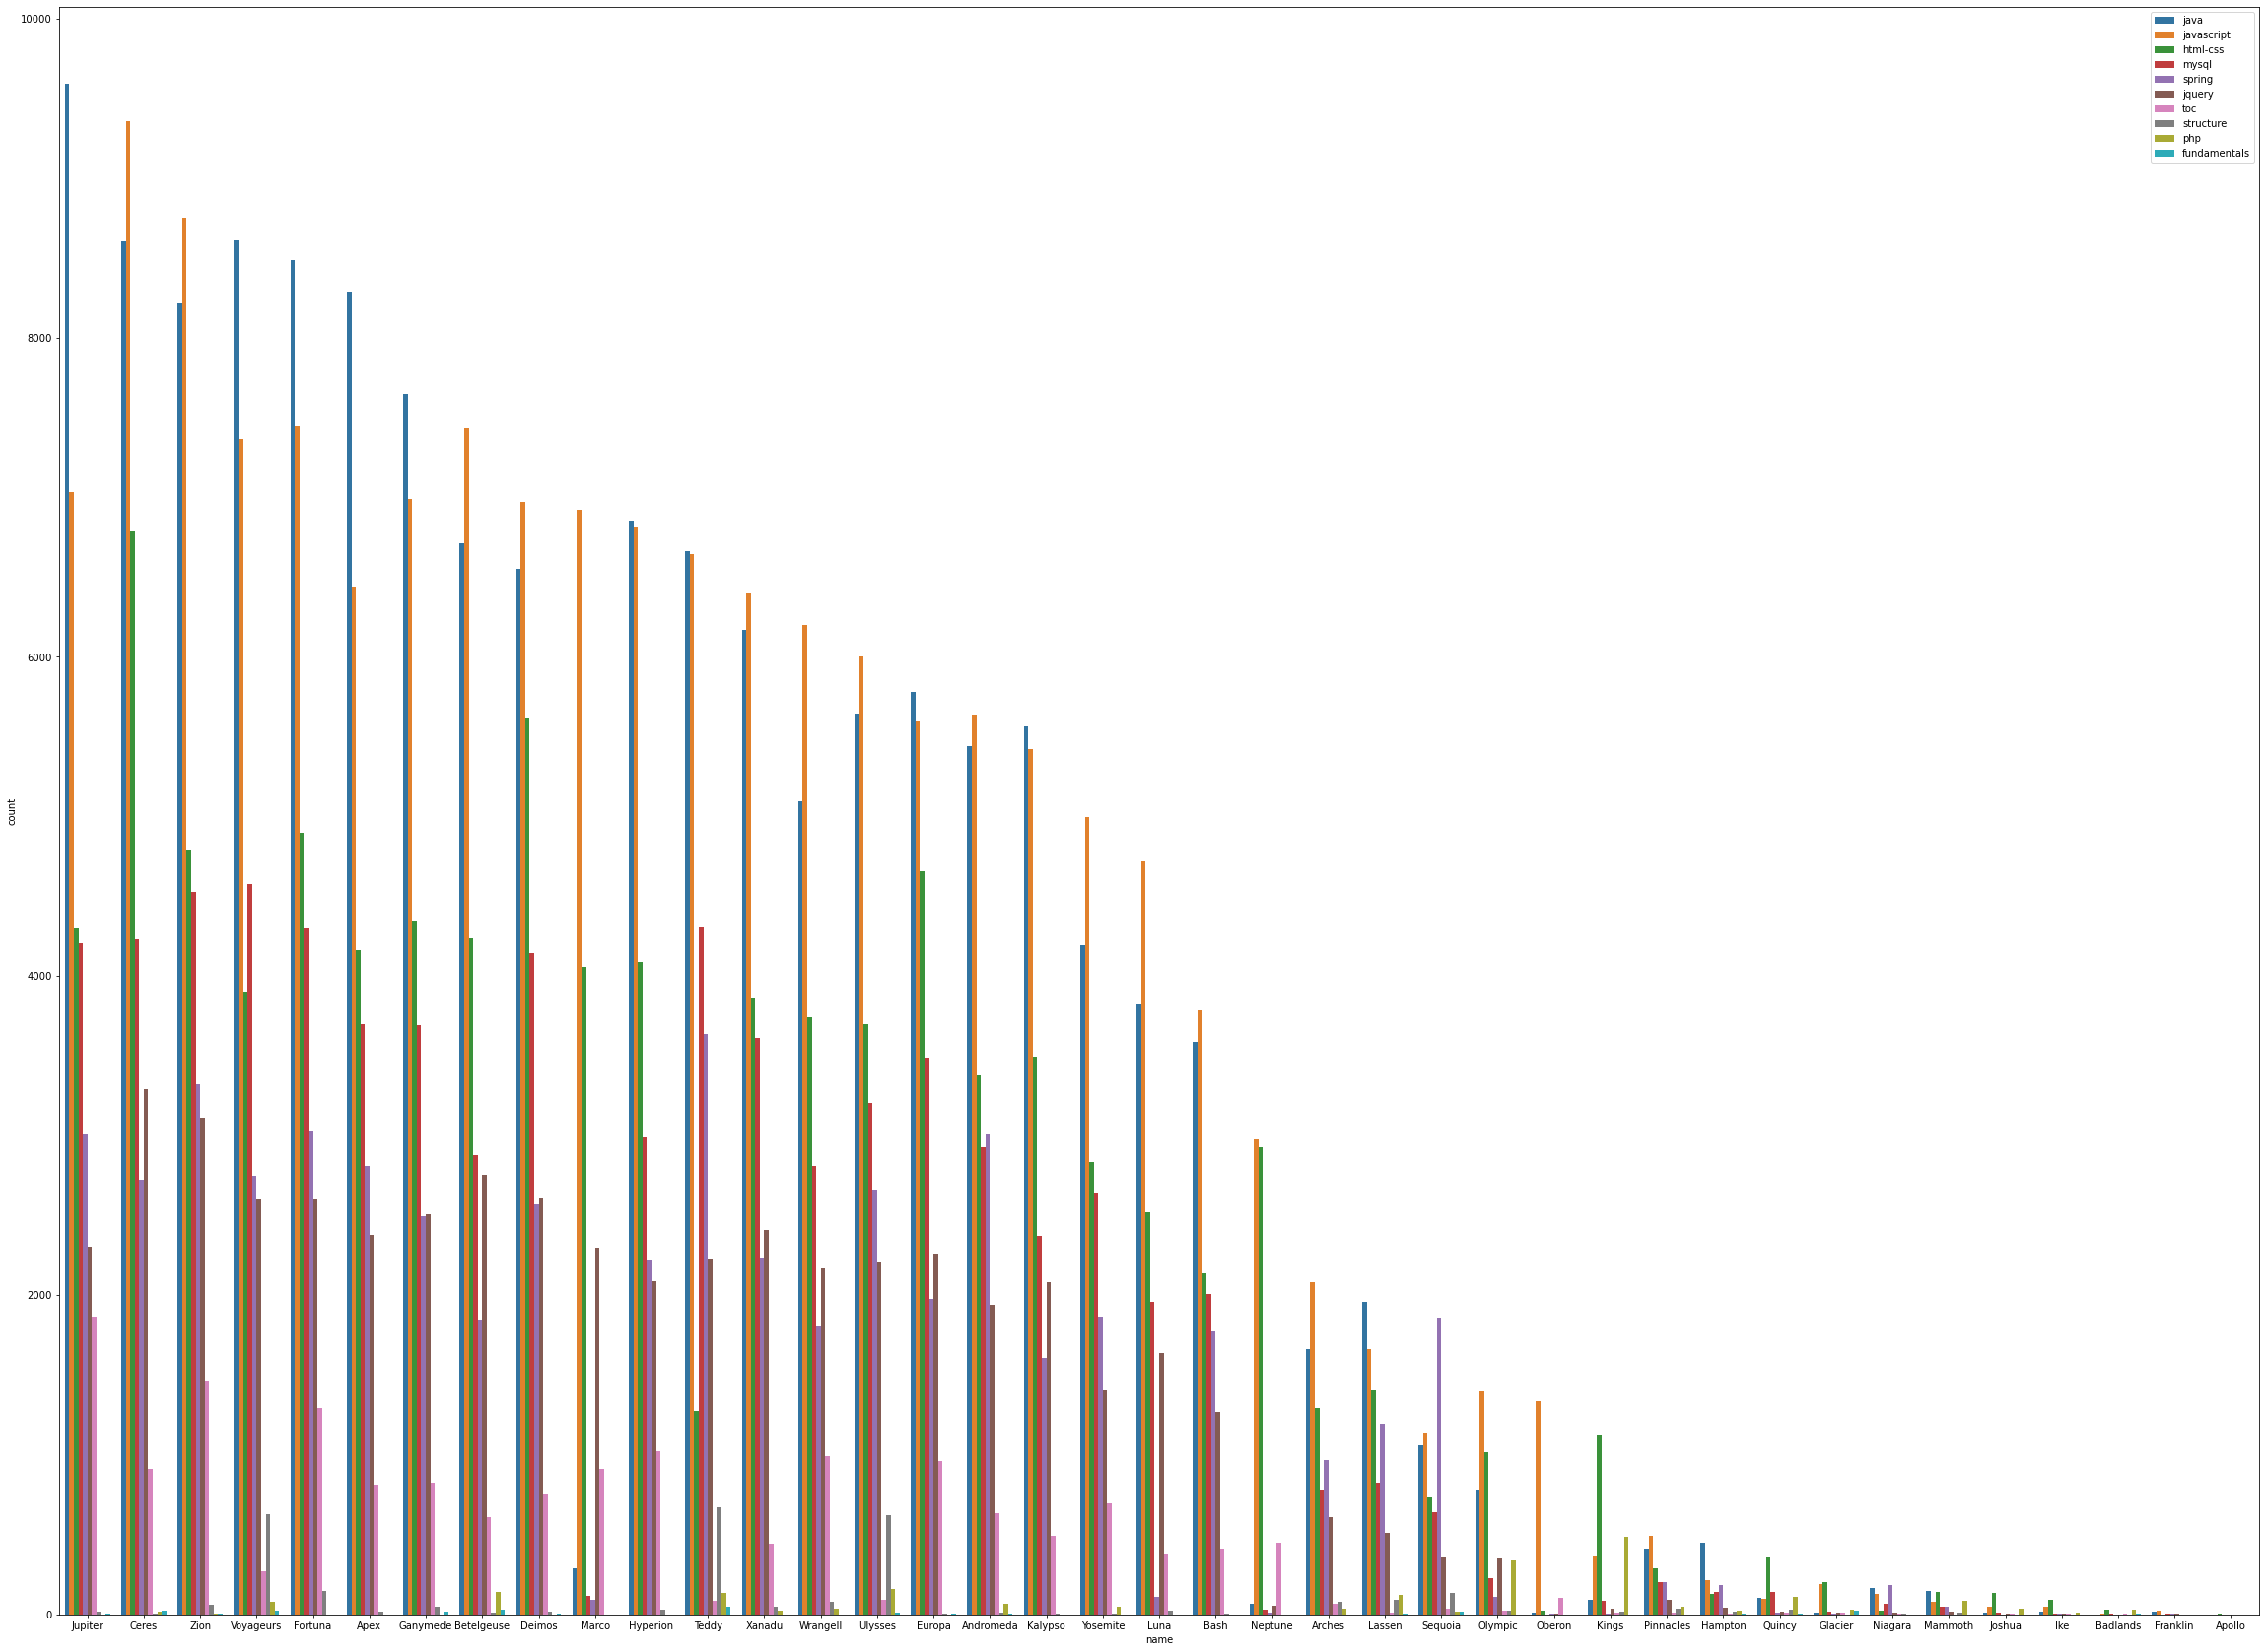

In [132]:
plt.figure(figsize=(40, 30))
sns.barplot(data=webdev_lessons, x='name', y='count', hue='lesson')
plt.legend(loc=1)

In [ ]:
df_ds.head()

In [ ]:
df_webdev.head()

# Code from Bonus: Identify users who are viewing both the web dev and data science curriculum 

In [ ]:
# find data science students that have logs for web deb pages
# subset df to data_science only
df_data_science = df[df.program_namer=='data_science']
df_data_science.head()

In [ ]:
# find data science student endpoints that contain java or html
df_data_science.endpoint.str.contains(pat = 'html|java', case=False, regex=True).sum() # Too few to continue

In [ ]:
# make list of data science endpoints
ds_endpoints = df_data_science.endpoint.unique()
ds_endpoints = pd.Series(ds_endpoints)
ds_endpoints

In [ ]:
ds_endpoints.str.contains('java|html', case=False, regex=True)

In [ ]:
# find web dev students with endpoints of data science endpoints
df_web_dev = df[df.program_name=='web_dev']
df_web_dev.head()

In [ ]:
df_web_dev[df_web_dev.endpoint.isin(ds_endpoints)] # 234K observation of web dev have 